Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomNormal, Constant
from glob import glob

In [11]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [12]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CXR_data/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CXR_data/Test')

In [13]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2253
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [14]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [15]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=os.listdir(data_dir_train),
    batch_size=batch_size,
    validation_split=.2,
    subset='training',
    image_size=(img_height, img_width),
    seed=123
)

Found 14253 files belonging to 9 classes.
Using 11403 files for training.


In [16]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=os.listdir(data_dir_train),
    batch_size=batch_size,
    validation_split=.2,
    subset='validation',
    image_size=(img_height, img_width),
    seed=123
)

Found 14253 files belonging to 9 classes.
Using 2850 files for validation.


In [17]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['melanoma', 'seborrheic keratosis', 'vascular lesion', 'dermatofibroma', 'actinic keratosis', 'squamous cell carcinoma', 'pigmented benign keratosis', 'basal cell carcinoma', 'nevus']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

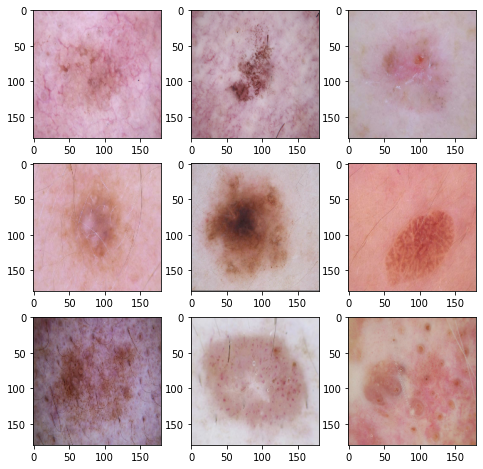

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(8, 8))

def preview_data(num_of_images, dataset):
  for img, label in dataset.take(1):
    for i in range(9):
      axes = plt.subplot(3, 3, i + 1)
      plt.imshow(img[i].numpy().astype("uint8"))

preview_data(9, train_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
number_of_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(12, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(24, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(48, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(96, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 12)      336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 24)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 48)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 258s 2s/step - loss: 1.9108 - accuracy: 0.3072 - val_loss: 1.6923 - val_accuracy: 0.3653
Epoch 2/20
57/57 [==============================] - 48s 850ms/step - loss: 1.5744 - accuracy: 0.4469 - val_loss: 1.6041 - val_accuracy: 0.4031
Epoch 3/20
57/57 [==============================] - 48s 847ms/step - loss: 1.4592 - accuracy: 0.5031 - val_loss: 1.4190 - val_accuracy: 0.4944
Epoch 4/20
57/57 [==============================] - 48s 850ms/step - loss: 1.3728 - accuracy: 0.5270 - val_loss: 1.4382 - val_accuracy: 0.4989
Epoch 5/20
57/57 [==============================] - 48s 849ms/step - loss: 1.3318 - accuracy: 0.5409 - val_loss: 1.5134 - val_accuracy: 0.4766
Epoch 6/20
57/57 [==============================] - 48s 849ms/step - loss: 1.3219 - accuracy: 0.5459 - val_loss: 1.3223 - val_accuracy: 0.5256
Epoch 7/20
57/57 [==============================] - 48s 850ms/step - loss: 1.1785 - accuracy: 0.5882 - val_loss: 1.4014 - val_accuracy: 0.5122
E

### Visualizing training results

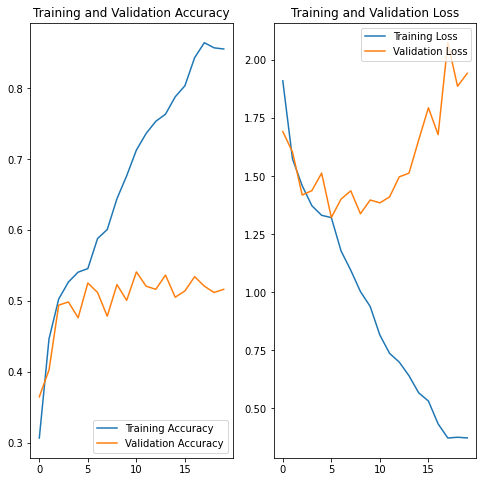

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

It appears that the model is overfitting to the data. The validation accuracy remains slow to increase over time while the training accuracy increases quite rapdily after several epochs. We'll use a variety of data augmentation steps to help the model learn from different views of the data. It's important to note that we can flip, rotate and zoom our imagery because of the modality it is. If we were looking at x-rays we would be limited in the augmentation we can perform.



### Write your findings here

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height,img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
    ])

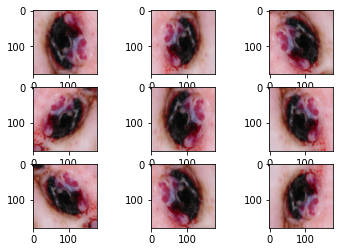

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Adding one image to preview augmented in 9 different ways
for img, label in train_ds.take(1):
    for i in range(9):
      augmented_images = data_augmentation(img)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

number_of_classes = 9

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(12, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=.2),
    layers.Conv2D(24, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=.2),
    layers.Conv2D(48, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=.2),
    layers.Flatten(),
    layers.Dense(96, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])


### Compiling the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 63s 1s/step - loss: 2.2342 - accuracy: 0.1931 - val_loss: 2.1053 - val_accuracy: 0.2606
Epoch 2/20
57/57 [==============================] - 61s 1s/step - loss: 2.0275 - accuracy: 0.2081 - val_loss: 2.1119 - val_accuracy: 0.3430
Epoch 3/20
57/57 [==============================] - 60s 1s/step - loss: 1.8496 - accuracy: 0.3300 - val_loss: 1.8015 - val_accuracy: 0.3363
Epoch 4/20
57/57 [==============================] - 60s 1s/step - loss: 1.6748 - accuracy: 0.4101 - val_loss: 1.6901 - val_accuracy: 0.3987
Epoch 5/20
57/57 [==============================] - 60s 1s/step - loss: 1.5755 - accuracy: 0.4658 - val_loss: 1.6324 - val_accuracy: 0.4031
Epoch 6/20
57/57 [==============================] - 60s 1s/step - loss: 1.6122 - accuracy: 0.4391 - val_loss: 1.6368 - val_accuracy: 0.4187
Epoch 7/20
57/57 [==============================] - 60s 1s/step - loss: 1.5264 - accuracy: 0.4686 - val_loss: 1.5651 - val_accuracy: 0.4343
Epoch 8/20
57/57 [==

### Visualizing the results

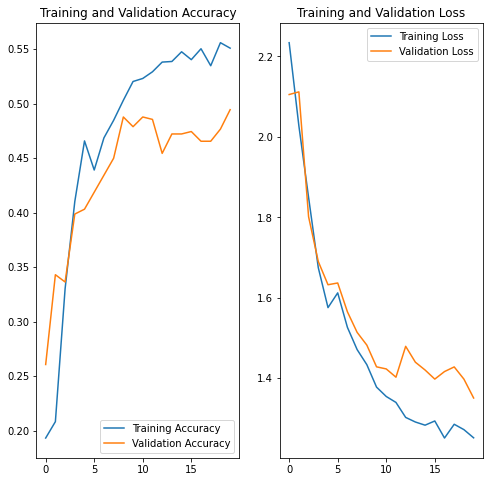

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Even though we added data augmentation, we still see that the training and validation sets are performing poorly. However, the validation and training set accuracy are much closer together now so it's less likely to do with imagery and potentially to do with class imbalance. The model is now underfit.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

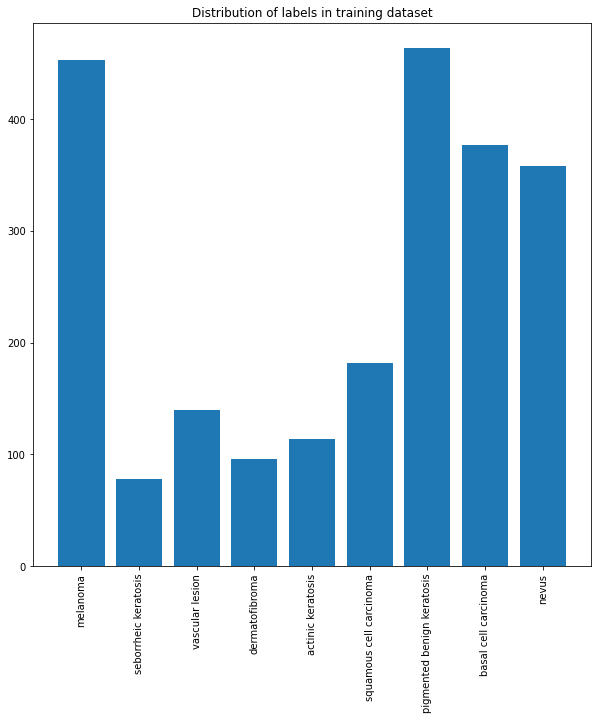

In [22]:
def get_dist(directory):
  data_dist = {}
  for name in class_names:
    path = os.path.join(directory, name)
    count = len(os.listdir(path))
    data_dist[name] = count
  return data_dist

train_data_dist = get_dist(data_dir_train)
    
plt.figure(figsize=(10, 10))
plt.bar(train_data_dist.keys(), train_data_dist.values())
plt.title('Distribution of labels in training dataset')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
Our dataset is highly imbalanced. Fortunately there are a handful of libraries that can help us rebalance the dataset and augment the data in the process! Class imbalance can be a large problelm in boosting model performance. If any particular class is disporportionatly represented in the dataset, the model will tend to focus its learnings on that class feature, resulting in an underfit model.
#### - Which class has the least number of samples?
Seborreic keratosis has the least number of samples in our training set.
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented benign keratosis dominates the data in terms of number of samples.



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset= str(data_dir_train) + "/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 452 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7F40AF625730>: 100%|██████████| 500/500 [00:08<00:00, 59.79 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F40AF645AF0>: 100%|██████████| 500/500 [00:03<00:00, 151.53 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40B0156130>: 100%|██████████| 500/500 [00:02<00:00, 193.99 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F40AF78F190>: 100%|██████████| 500/500 [00:02<00:00, 205.45 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F40AF619B80>: 100%|██████████| 500/500 [00:02<00:00, 205.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40AF6AEB20>: 100%|██████████| 500/500 [00:02<00:00, 196.02 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F416A531250>: 100%|██████████| 500/500 [00:02<00:00, 183.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40214DAB50>: 100%|██████████| 500/500 [00:02<00:00, 191.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CXR_data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7F40AF6CA0A0>: 100%|██████████| 500/500 [00:06<00:00, 80.25 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

16500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
# creating paths for both original and augmented data
path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

# creating paths for both original and augmented data
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train,'*','*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
data_dict = dict(zip(path_list_new, lesion_list_new))

dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()), columns = ['Path','Label'])

dataframe_augmented_data = pd.DataFrame(list(data_dict.items()),columns = ['Path','Label'])
combined_dataframe = original_df.append(dataframe_augmented_data)

# checkign value counts to see how many images we have across classes
combined_dataframe['Label'].value_counts()

melanoma                      4000
seborrheic keratosis          2253
vascular lesion               2000
dermatofibroma                2000
squamous cell carcinoma       2000
pigmented benign keratosis    2000
basal cell carcinoma          2000
nevus                         2000
actinic keratosis              500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/CXR_data/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6746 files belonging to 9 classes.
Using 5397 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6746 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=2)]

In [ ]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(60, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=.2),
    layers.Conv2D(1120, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=.2),
    layers.Conv2D(240, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(2240, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50


#### **Todo:**  Visualize the model results

ValueError: ignored

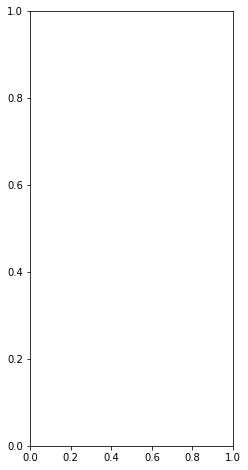

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Our augmentation to help class rebalance did get rid of most of the overfitting and underfitting. It appears that the model is performing somewhat adaquetly. In addition, class rebalance helped the model avoid underfitting to the data.
- While normalization of the data is a standard process in preparing data for machine learning, it is worth noting that our use of normalizing the data betwen 0-1 vs 1-255 helped in model training.
- We used dropout after various layers to help with underfitting. This did help in model performance by helping the model learn better from the data.
- However, model architecture and learning rate is someting that I would play with next to better under optimize the model for the task. 